In [1]:
import os
import sys
import ROOT
#from PlotStack4l import PlotStack4l
import numpy as np
import math
import argparse
import matplotlib.pyplot as plt

%jsroot on
# voms-proxy-init generated user proxy file to access the xrootd servers
#os.environ['X509_USER_PROXY'] = '/eos/user/b/bockjoo/mySWAN/cmsuser.proxy'
os.environ['X509_USER_PROXY'] = '/home/bockjoo/.cmsuser.proxy'
if os.path.isfile(os.environ['X509_USER_PROXY']):
    pass
else:
    print "os.environ['X509_USER_PROXY'] ",os.environ['X509_USER_PROXY']
    print "You need to put your grid proxy somewhere under /eos/user/<your alpha>/<Username>"
    sys.exit(1)
#os.environ['X509_CERT_DIR'] = '/cvmfs/grid.cern.ch/etc/grid-security/certificates'
#os.environ['X509_VOMS_DIR'] = '/cvmfs/grid.cern.ch/etc/grid-security/vomsdir'
os.environ['X509_CERT_DIR'] = '/cvmfs/cms.cern.ch/grid/etc/grid-security/certificates'
os.environ['X509_VOMS_DIR'] = '/cvmfs/cms.cern.ch/grid/etc/grid-security/vomsdir'
    
#root_file="root://cms-xrd-global.cern.ch//store/user/nvanegas/BckgndW+Jets/tag_1_delphes_events01.root"
#tfil = ROOT.TFile(root_file)
#tfil = ROOT.TFile.Open(root_file)

#print "Listing Tree"

#tfil.ls()

Welcome to JupyROOT 6.07/07


In [2]:
# Convert root ntuple format to arrays
def get_data(t):
  weight = []
  pfmet  = []
  mass4l = []
  mT     = []
  dphi   = []
  Dkin   = []
  D      = []
  Ngood  = []
  for evt in t:
    weight.append(evt.f_weight)
    pfmet .append(evt.f_pfmet)
    mass4l.append(evt.f_mass4l)
    mT    .append(evt.f_mT)
    dphi  .append(evt.f_dphi)
    Dkin  .append(evt.f_D_bkg_kin)
    #D     .append(Dmass4l(evt.f_mass4l, evt.f_D_bkg_kin, 0, 199))
    Ngood .append(evt.f_Ngood)
  return (weight, pfmet, mass4l, mT, dphi, Dkin, D, Ngood)


In [5]:
# Calculate the Punzi significance for a signal model, fill hists
def get_punzi(signal, flist, cut_pfmet):
  
  # Initialize arrays
  counter_B = np.zeros((len(cut_pfmet)))
  counter_S = np.zeros((len(cut_pfmet)))
  eff_S     = np.zeros((len(cut_pfmet)))
  punzi     = np.zeros((len(cut_pfmet)))

  # load bnn
  #record = open('Dmass4l.cpp').read()
  #gROOT.ProcessLine(record)

  # loop through files in filelist, incrementing counters and filling arrays
  for ff in flist:
    
    print ff
    # Get Data
    #f = TFile(f)
    f = ROOT.TFile.Open(ff)
    t = f.Get("HZZ4LeptonsAnalysisReduced")
    weight, pfmet, mass4l, m4lt, dphi, Dkin, D, Ngood = get_data(t)
    
    # Loop through arrays
    for n in range(0, len(weight)):

      # Signal region selection
      if Ngood[n] != 4: continue
      #if pfmet[n] < 140: continue
      if np.abs(mass4l[n] - 125) > 10: continue
      #if m4lt[n] < 280: continue
      #if dphi[n] < 2.8: continue
      #if D[n] > 0.2: continue
    
      # Increment counters
      for i in range(0, len(cut_pfmet)):     
         #if np.abs(mass4l[n] - 125) < cut_pfmet[i] and 'Run2016' not in f.GetName() and 'MZp' not in f.GetName(): 
         #    counter_B[i] += weight[n]
         #if np.abs(mass4l[n] - 125) < cut_pfmet[i] and signal in f.GetName():
         #    counter_S[i] += weight[n]
         if pfmet[n] > cut_pfmet[i] and 'Run2016' not in f.GetName() and 'MZp' not in f.GetName(): 
             counter_B[i] += weight[n]
         if pfmet[n] > cut_pfmet[i] and signal in f.GetName():
             counter_S[i] += weight[n]
  print counter_B
  print counter_S  
  # Calculate efficiency and Punzi signficance from counter arrays
  for i in range(0, len(cut_pfmet)):
    eff_S[i] = counter_S[i]/counter_S[0]
    punzi[i] = (counter_S[i]/counter_S[0]) / (5/2 + np.sqrt(counter_B[i]))
 
  print eff_S
  print punzi
 
  return (punzi, eff_S)


In [14]:
if __name__ == "__main__":
  #print "It is main"
  ## Parse command line arguments
  #parser = argparse.ArgumentParser()
  #parser.add_argument('--channel', required=True, help='Decay channel: 4mu, 4e, or 2e2mu')
  #args = parser.parse_args()
  args_channel = "2e2mu"
  args_channel = "4e"
  args_channel = "4mu"
  # Read in file list
  #flist = map(lambda x: x.split()[-1], open('filelist_' + args.channel + '_2016_Spring16_AN_Bari_noZX.txt').readlines())
  flist = map(lambda x: x.split()[-1], open('filelist_' + args_channel + '_2016_Spring16_AN_Florida_noZX.txt').readlines())
  
  # Define range and step size for met cut
  cut_pfmet = np.arange(1, 500, 25)
  #cut_pfmet = np.arange(1, 8, 0.25)
  print cut_pfmet

  #for ff in flist:
  #  f = ROOT.TFile.Open(ff)
  #  t = f.Get("HZZ4LeptonsAnalysisReduced")
  #  t.Print()
  #  break

[  1  26  51  76 101 126 151 176 201 226 251 276 301 326 351 376 401 426
 451 476]


In [16]:
  # Return signal efficiency and punzi significance for different signals
  print 600
  punzi600,  eff_S600  = get_punzi('2HDM_MZp-600_MA0-300', flist, cut_pfmet)


600
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016G-23Sep2016-v1_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_

In [17]:
  print 800
  punzi800,  eff_S800  = get_punzi('2HDM_MZp-800_MA0-300', flist, cut_pfmet)


800
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016G-23Sep2016-v1_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_

In [18]:
  print 1000
  punzi1000, eff_S1000 = get_punzi('2HDM_MZp-1000_MA0-300', flist, cut_pfmet)


1000
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016G-23Sep2016-v1_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu

In [19]:
  print 1200
  punzi1200, eff_S1200 = get_punzi('2HDM_MZp-1200_MA0-300', flist, cut_pfmet)


1200
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016G-23Sep2016-v1_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu

In [20]:
  print 1400
  punzi1400, eff_S1400 = get_punzi('2HDM_MZp-1400_MA0-300', flist, cut_pfmet)


1400
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016G-23Sep2016-v1_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu

In [21]:
  print 1700
  punzi1700, eff_S1700 = get_punzi('2HDM_MZp-1700_MA0-300', flist, cut_pfmet)


1700
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016G-23Sep2016-v1_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu

In [22]:
  print 2000
  punzi2000, eff_S2000 = get_punzi('2HDM_MZp-2000_MA0-300', flist, cut_pfmet)


2000
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016G-23Sep2016-v1_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu

In [23]:
  print 2500
  punzi2500, eff_S2500 = get_punzi('2HDM_MZp-2500_MA0-300', flist, cut_pfmet)


2500
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu_25ns/output_DoubleMuon_Run2016G-23Sep2016-v1_miniaod_1.root
/raid/raid7/bockjoo/MonoHiggs/store/user/defilip/MonoHiggs/80X/histos4mu

In [24]:
  # Print optimal significance and MET cuts
  print 'MZP [GeV]      | 600  | 800  | 1000 | 1200 | 1400 | 1700 | 2000 | 2500'
  print 'Max punzi      | %.2f | %.2f | %.2f | %.2f | %.2f | %.2f | %.2f | %.2f' % (max(punzi600), max(punzi800), max(punzi1000), max(punzi1200), max(punzi1400), max(punzi1700), max(punzi2000), max(punzi2500))
  print 'MET cut [GeV]  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f  | %3.2f' % (cut_pfmet[np.argmax(punzi600)], cut_pfmet[np.argmax(punzi800)], cut_pfmet[np.argmax(punzi1000)], cut_pfmet[np.argmax(punzi1200)], cut_pfmet[np.argmax(punzi1400)], cut_pfmet[np.argmax(punzi1700)], cut_pfmet[np.argmax(punzi2000)], cut_pfmet[np.argmax(punzi2500)])



MZP [GeV]      | 600  | 800  | 1000 | 1200 | 1400 | 1700 | 2000 | 2500
Max punzi      | 0.39 | 0.45 | 0.46 | 0.46 | 0.46 | 0.46 | 0.45 | 0.42
MET cut [GeV]  | 101.00  | 176.00  | 201.00  | 201.00  | 176.00  | 226.00  | 176.00  | 176.00


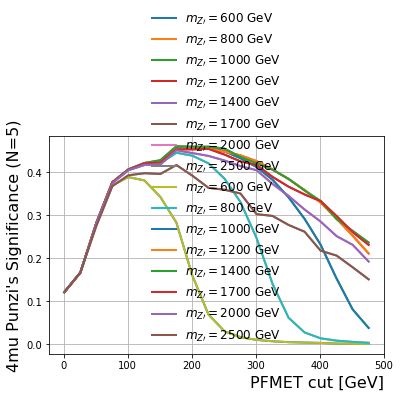

In [26]:
  
  # Format plots
  plt.figure(1)
  plt.plot(cut_pfmet, punzi600,  linewidth=2.0, label=r'$m_{Z\prime} = 600 \rm{\ GeV}$')
  plt.plot(cut_pfmet, punzi800,  linewidth=2.0, label=r'$m_{Z\prime} = 800 \rm{\ GeV}$')
  plt.plot(cut_pfmet, punzi1000, linewidth=2.0, label=r'$m_{Z\prime} = 1000 \rm{\ GeV}$')
  plt.plot(cut_pfmet, punzi1200, linewidth=2.0, label=r'$m_{Z\prime} = 1200 \rm{\ GeV}$')
  plt.plot(cut_pfmet, punzi1400, linewidth=2.0, label=r'$m_{Z\prime} = 1400 \rm{\ GeV}$')
  plt.plot(cut_pfmet, punzi1700, linewidth=2.0, label=r'$m_{Z\prime} = 1700 \rm{\ GeV}$')
  plt.plot(cut_pfmet, punzi2000, linewidth=2.0, label=r'$m_{Z\prime} = 2000 \rm{\ GeV}$')
  plt.plot(cut_pfmet, punzi2500, linewidth=2.0, label=r'$m_{Z\prime} = 2500 \rm{\ GeV}$')
  #plt.axis([0, 500, 0, 0.5])
  plt.ylabel(args_channel + ' Punzi\'s Significance (N=5)', fontsize=16)
  plt.xlabel('PFMET cut [GeV]', horizontalalignment='right', x=1.0, fontsize=16)
  #plt.xlabel(r'$M_{llll} \rm{\ cut\ [GeV]}$', horizontalalignment='right', x=1.0, fontsize=16)
  plt.grid(True)
  plt.legend(loc='best', frameon=False, prop={'size':12})
  plt.savefig(args_channel + '_punzi_met.png')
  #plt.savefig(args.channel + '_punzi_m4l.png')
 
  #plt.figure(2)
  #plt.plot(cut_pfmet, eff_S600,  linewidth=2.0, label=r'$m_{Z\prime} = 600 \rm{GeV}$')
  #plt.plot(cut_pfmet, eff_S800,  linewidth=2.0, label=r'$m_{Z\prime} = 800 \rm{GeV}$')
  #plt.plot(cut_pfmet, eff_S1000, linewidth=2.0, label=r'$m_{Z\prime} = 1000 \rm{GeV}$')
  #plt.plot(cut_pfmet, eff_S1200, linewidth=2.0, label=r'$m_{Z\prime} = 1200 \rm{GeV}$')
  #plt.plot(cut_pfmet, eff_S1400, linewidth=2.0, label=r'$m_{Z\prime} = 1400 \rm{GeV}$')
  #plt.plot(cut_pfmet, eff_S1700, linewidth=2.0, label=r'$m_{Z\prime} = 1700 \rm{GeV}$')
  #plt.plot(cut_pfmet, eff_S2000, linewidth=2.0, label=r'$m_{Z\prime} = 2000 \rm{GeV}$')
  #plt.plot(cut_pfmet, eff_S2500, linewidth=2.0, label=r'$m_{Z\prime} = 2500 \rm{GeV}$')
  #plt.axis([0, 500, 0, 1.1])
  #plt.ylabel(args.channel + ' Signal Efficiency', horizontalalignment='right', y=1.0, fontsize=18)
  #plt.xlabel('MET cut [GeV]', horizontalalignment='right', x=1.0, fontsize=18)
  #plt.grid(True)
  #plt.legend(loc='best', frameon=False, prop={'size':14})
  #plt.savefig(args.channel + '_eff_met.png')

  plt.show()


In [ ]:
# The End

In [ ]:
#root_file="root://cms-xrd-global.cern.ch//store/user/nvanegas/BckgndW+Jets/tag_1_delphes_events01.root"
root_file = "root://cmseos.fnal.gov//store/group/lpchzz4leptons/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root"
ff = ROOT.TFile.Open(root_file)
ff.ls()

In [2]:
thestack = PlotStack4l()
thestack.plotstack4l()


KeyboardInterrupt: 

INFO storing sample names to variables with  filelist_4l_2016_Spring16_AN_FNAL_miniaod_xrootd.txt
Doing plot for  13TeV   and  13TeV
Plotting 4e+4mu+2e2mu combined in 4lepton plots
This is  4l
Reading  root://cmseos.fnal.gov//store/group/lpchzz4leptons/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_1.root

Reading  root://cmseos.fnal.gov//store/group/lpchzz4leptons/histos4mu_25ns/output_DoubleMuon_Run2016B-23Sep2016-v3_miniaod_2.root

Reading  root://cmseos.fnal.gov//store/group/lpchzz4leptons/histos4mu_25ns/output_DoubleMuon_Run2016C-23Sep2016-v1_miniaod.root

Reading  root://cmseos.fnal.gov//store/group/lpchzz4leptons/histos4mu_25ns/output_DoubleMuon_Run2016D-23Sep2016-v1_miniaod.root

Reading  root://cmseos.fnal.gov//store/group/lpchzz4leptons/histos4mu_25ns/output_DoubleMuon_Run2016E-23Sep2016-v1_miniaod.root

Reading  root://cmseos.fnal.gov//store/group/lpchzz4leptons/histos4mu_25ns/output_DoubleMuon_Run2016F-23Sep2016-v1_miniaod.root

Reading  root://cmseos.fnal.g